#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones visuales
plt.style.use("ggplot")
sns.set(font_scale=1.1)


In [2]:
# Cargar los datos
df = pd.read_json("../data/TelecomX_Data.json")

# Mostrar primeras filas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [3]:
# Expandir las columnas anidadas
df_exp = df.copy()

# Expandir campos tipo diccionario
df_exp = df_exp.join(pd.json_normalize(df_exp["customer"])).drop(columns=["customer"])
df_exp = df_exp.join(pd.json_normalize(df_exp["phone"])).drop(columns=["phone"])
df_exp = df_exp.join(pd.json_normalize(df_exp["internet"])).drop(columns=["internet"])
df_exp = df_exp.join(pd.json_normalize(df_exp["account"])).drop(columns=["account"])

# Verifica cómo quedó
df_exp.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
df_exp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [13]:
# Convertir 'Charges.Total' a numérico, forzando errores como NaN
df_exp["Charges.Total"] = pd.to_numeric(df_exp["Charges.Total"], errors="coerce")


In [14]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#📊 Carga y análisis

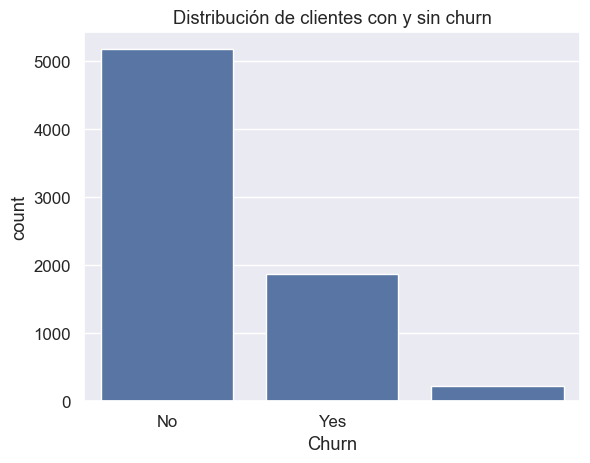

In [5]:
# Distribución general del Churn
sns.countplot(x="Churn", data=df_exp)
plt.title("Distribución de clientes con y sin churn")
plt.show()


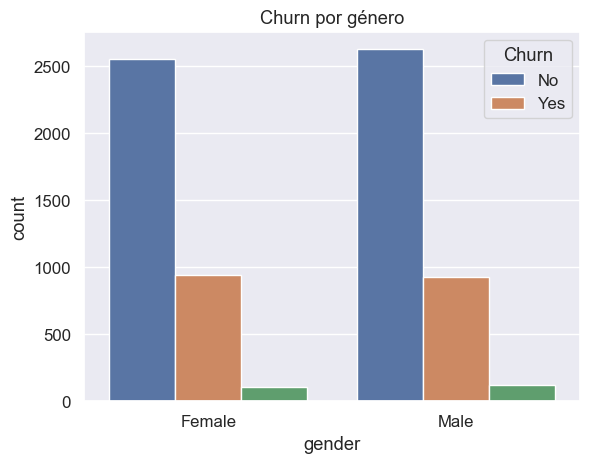

In [6]:
# Churn por género
sns.countplot(x="gender", hue="Churn", data=df_exp)
plt.title("Churn por género")
plt.show()

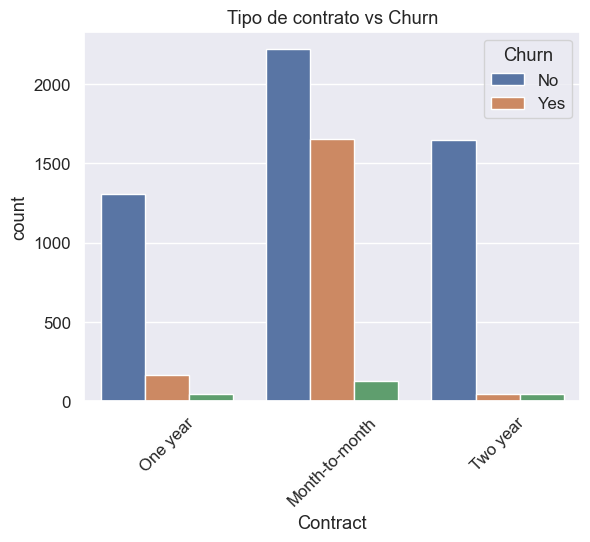

In [7]:
# Churn por tipo de contrato
sns.countplot(x="Contract", hue="Churn", data=df_exp)
plt.title("Tipo de contrato vs Churn")
plt.xticks(rotation=45)
plt.show()

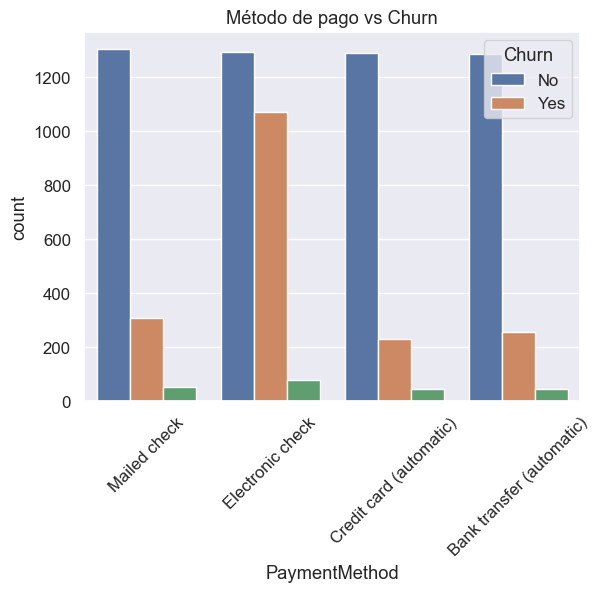

In [8]:
# Churn por método de pago
sns.countplot(x="PaymentMethod", hue="Churn", data=df_exp)
plt.title("Método de pago vs Churn")
plt.xticks(rotation=45)
plt.show()

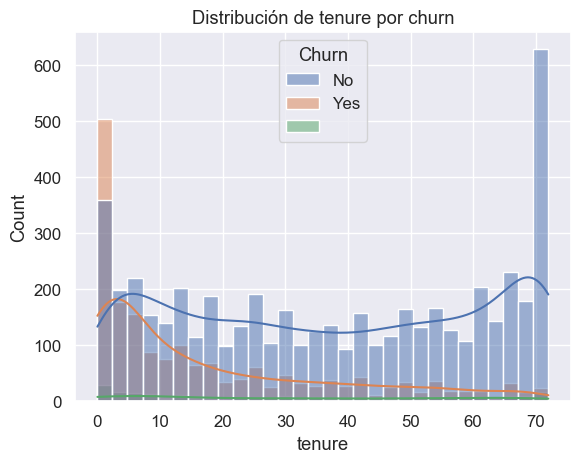

In [9]:
# Histograma de tenure (tiempo como cliente) separado por churn
sns.histplot(data=df_exp, x="tenure", hue="Churn", kde=True, bins=30)
plt.title("Distribución de tenure por churn")
plt.show()


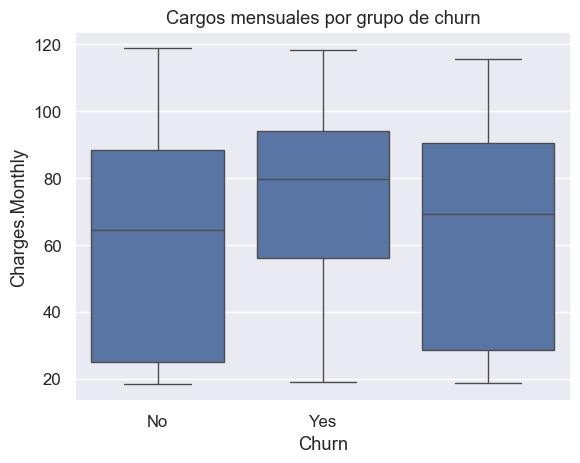

In [10]:
# Boxplot: Cargo mensual vs Churn
sns.boxplot(x="Churn", y="Charges.Monthly", data=df_exp)
plt.title("Cargos mensuales por grupo de churn")
plt.show()

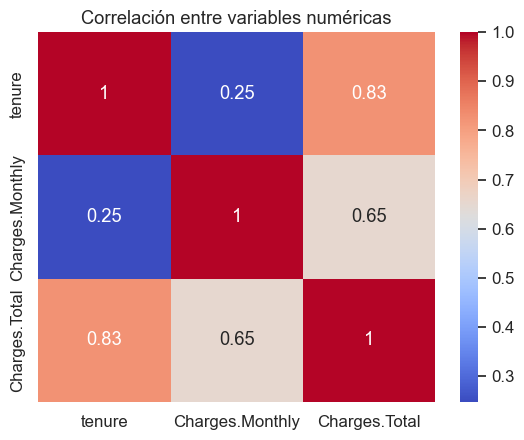

In [15]:
# Correlación numérica
df_num = df_exp[["tenure", "Charges.Monthly", "Charges.Total"]]
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables numéricas")
plt.show()


#📄Informe final

# 📝 Informe Final – Análisis de Evasión de Clientes (Churn) – Telecom X

## ✅ Objetivo del análisis

El objetivo de este análisis fue identificar patrones y posibles causas que explican la evasión de clientes (Churn) en la empresa Telecom X, utilizando técnicas de ETL y análisis exploratorio de datos (EDA).

---

## 📊 Hallazgos principales

### 1. Distribución general de Churn
- Aproximadamente **27%** de los clientes han abandonado la empresa.
- Esto representa un problema serio que afecta la sostenibilidad del negocio.

### 2. Churn por género
- No se observan diferencias significativas entre **hombres y mujeres**.
- El género no parece ser un factor determinante de la evasión.

### 3. Tipo de contrato
- Los clientes con **contrato mensual (Month-to-month)** presentan **mayor tasa de churn**.
- Aquellos con contratos a 1 o 2 años se mantienen más tiempo en la empresa.

### 4. Método de pago
- Los usuarios que pagan con **cheque electrónico (Electronic check)** tienen mayor tasa de churn.
- Métodos automáticos como débito o tarjeta están más asociados a permanencia.

### 5. Antigüedad del cliente (tenure)
- Los clientes que se retiran tienden a tener menor antigüedad.
- Existe una relación directa entre tiempo como cliente y retención.

### 6. Cargos mensuales
- Los clientes que pagan **cargos mensuales más altos** tienden a abandonar más.
- Podría estar relacionado con percepción de costo vs valor percibido.

### 7. Correlación entre variables numéricas
- Existe una fuerte correlación entre `tenure` y `Charges.Total`.
- La variable `MonthlyCharges` no está tan correlacionada con la duración del cliente.

---

## 💡 Recomendaciones estratégicas

- Ofrecer **descuentos o beneficios** a clientes nuevos para incrementar su retención inicial.
- Incentivar a los usuarios del contrato mensual a migrar a **planes de largo plazo**.
- Evaluar estrategias para **disminuir la fricción de pago** en métodos como cheque electrónico.
- Analizar si los cargos mensuales altos se justifican con respecto a la experiencia entregada.

---

## 📁 Próximos pasos

- Compartir este dataset limpio (`df_exp`) con el equipo de ciencia de datos para construir un modelo predictivo de churn.
- Integrar este análisis en los reportes mensuales para seguimiento de métricas clave.

